CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from session5.model import Net
from session5.utils import train, test

CODE BLOCK: 2

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #YES
print(device)

CUDA Available? True
cuda


In [6]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 3

In [7]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [8]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [9]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

CODE BLOCK: 6

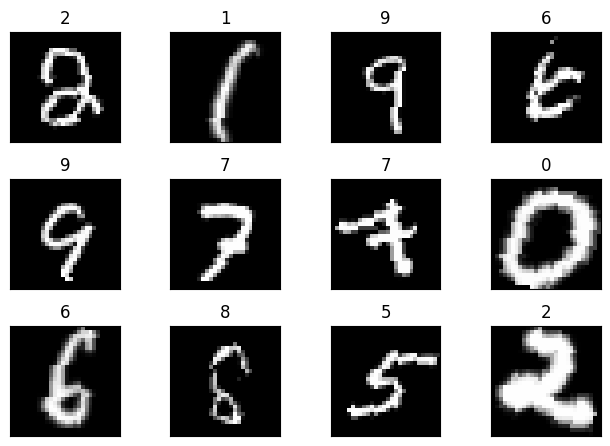

In [10]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 9

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0522 Batch_id=468 Accuracy=86.45: 100%|██████████| 469/469 [00:35<00:00, 13.24it/s]


Test set: Average loss: 0.0571, Accuracy: 9819/10000 (98.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1046 Batch_id=468 Accuracy=97.35: 100%|██████████| 469/469 [00:26<00:00, 17.57it/s]


Test set: Average loss: 0.0370, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0633 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:28<00:00, 16.38it/s]


Test set: Average loss: 0.0382, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1980 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:29<00:00, 15.93it/s]


Test set: Average loss: 0.0278, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0511 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:29<00:00, 15.81it/s]


Test set: Average loss: 0.0241, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0201 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:27<00:00, 16.77it/s]


Test set: Average loss: 0.0242, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0098 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:27<00:00, 17.02it/s]


Test set: Average loss: 0.0220, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0194 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:27<00:00, 16.75it/s]


Test set: Average loss: 0.0227, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0073 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:29<00:00, 16.15it/s]


Test set: Average loss: 0.0203, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0239 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:29<00:00, 16.17it/s]


Test set: Average loss: 0.0207, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0047 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:30<00:00, 15.58it/s]


Test set: Average loss: 0.0171, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0056 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:28<00:00, 16.72it/s]


Test set: Average loss: 0.0220, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0044 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:27<00:00, 16.91it/s]


Test set: Average loss: 0.0205, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0447 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:27<00:00, 16.77it/s]


Test set: Average loss: 0.0186, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0006 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:27<00:00, 16.93it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 0.0000e+00.
Epoch 16


Train: Loss=0.0063 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:27<00:00, 16.97it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 0.0000e+00.
Epoch 17


Train: Loss=0.0258 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:28<00:00, 16.64it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 0.0000e+00.
Epoch 18


Train: Loss=0.0024 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:28<00:00, 16.25it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 0.0000e+00.
Epoch 19


Train: Loss=0.0073 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:28<00:00, 16.56it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 0.0000e+00.
Epoch 20


Train: Loss=0.0026 Batch_id=468 Accuracy=99.52: 100%|██████████| 469/469 [00:28<00:00, 16.40it/s]


Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 0.0000e+00.


Text(0.5, 1.0, 'Test Accuracy')

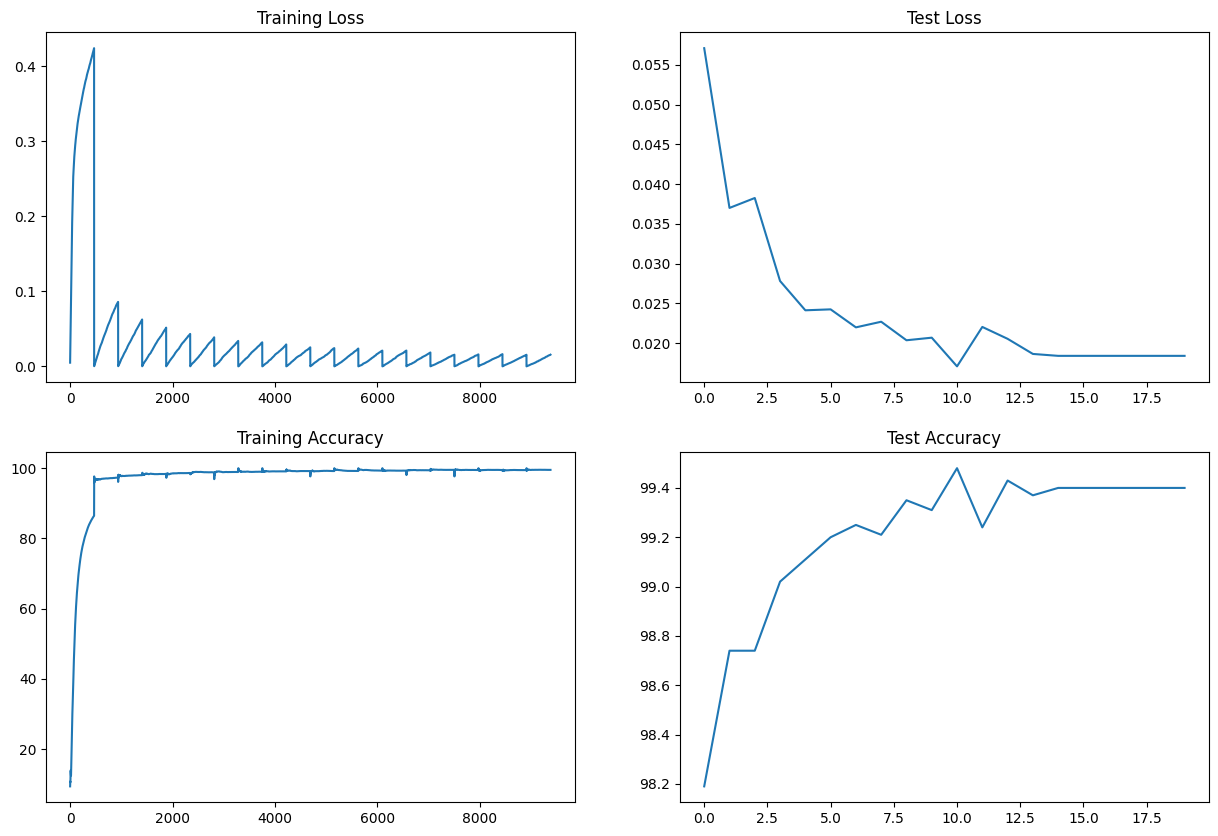

In [12]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")